<a href="https://colab.research.google.com/github/amitgit2510/Info_miners_2/blob/Amit/info_miners_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv")

<ipython-input-3-f04f50e51da7>:1: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv")


In [ ]:
df_backup = df

In [ ]:
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [ ]:
df.describe()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.622133e+06,2.617246e+06,2.617246e+06,2622133.0,2.619860e+06,2.619860e+06,2.622133e+06,2.622133e+06,2.622133e+06,2.617246e+06,1.951315e+06,4.881420e+05,2.622133e+06,2.622133e+06,2.622133e+06
mean,1.311066e+06,5.019051e+06,1.036953e+03,2010.0,1.919431e+02,1.121324e+02,4.069629e+02,1.016206e+01,1.948373e+00,1.266323e+06,1.569229e+06,2.213083e+06,3.103701e+02,2.945920e+04,1.186523e+04
std,7.569447e+05,2.249577e+06,6.448892e+02,0.0,1.565932e+02,8.761224e+01,2.404910e+02,5.923678e+00,8.986120e-01,8.226220e+06,9.379695e+06,1.225216e+07,9.769686e+02,5.640021e+04,2.727029e+04
min,0.000000e+00,1.010000e+05,1.000000e+00,2010.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e-02,0.000000e+00
25%,6.555330e+05,2.951001e+06,5.410000e+02,2010.0,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.666590e+05,1.644990e+05,1.662850e+05,0.000000e+00,7.900000e+03,3.290510e+03
50%,1.311066e+06,5.907002e+06,1.117000e+03,2010.0,1.570000e+02,1.240000e+02,3.610000e+02,8.000000e+00,2.000000e+00,2.053620e+05,2.012870e+05,2.029570e+05,0.000000e+00,1.567373e+04,6.175350e+03
75%,1.966599e+06,7.002002e+06,1.450000e+03,2010.0,2.180000e+02,2.110000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.335610e+05,2.305590e+05,2.335750e+05,0.000000e+00,3.172352e+04,1.222803e+04
max,2.622132e+06,7.004010e+06,9.059000e+03,2010.0,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,1.206004e+07,1.470885e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [ ]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [ ]:
df1=df.copy()

In [ ]:

# Specify the columns you want to check for null values
columns_to_check = ['Health Service Area', 'Hospital County', 'Operating Certificate Number','Facility ID','Zip Code - 3 digits','Patient Disposition','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code','CCS Procedure Description','APR Severity of Illness Description','APR Risk of Mortality']  # Replace with your desired column names

# Use the dropna() method with the subset parameter
df1=df1.dropna(subset=columns_to_check)


In [ ]:
df1.isnull().sum()

index                                        0
Health Service Area                          0
Hospital County                              0
Operating Certificate Number                 0
Facility ID                                  0
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                          0
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [ ]:
df1['Source of Payment 2'].fillna(df1['Source of Payment 1'])

5          Self-Pay
6          Self-Pay
7          Self-Pay
8          Self-Pay
9          Self-Pay
             ...   
2617241    Medicaid
2617242    Medicaid
2617243    Medicaid
2617244    Medicaid
2617245    Self-Pay
Name: Source of Payment 2, Length: 2611433, dtype: object

In [ ]:
df1.isnull().sum()

In [ ]:
SP = df.loc[df['Source of Payment 2'].isnull(), 'Source of Payment 1']

In [ ]:
SP

16487               Self-Pay
20572               Self-Pay
24833               Self-Pay
30350               Self-Pay
31923               Self-Pay
                 ...        
2622120    Insurance Company
2622121    Insurance Company
2622126    Insurance Company
2622131             Self-Pay
2622132    Insurance Company
Name: Source of Payment 1, Length: 810381, dtype: object

In [ ]:
SP.unique()

array(['Self-Pay', 'Insurance Company', 'Blue Cross', 'Medicaid',
       'Medicare', 'Other Federal Program', 'Workers Compensation',
       'CHAMPUS', 'Other Non-Federal Program', 'Unknown'], dtype=object)

In [ ]:
df["Source of Payment 1"].unique()

array(['Blue Cross', 'Insurance Company', 'Medicare', 'Medicaid',
       'Other Federal Program', 'Self-Pay', 'Other Non-Federal Program',
       'Workers Compensation', 'CHAMPUS', 'Unknown'], dtype=object)

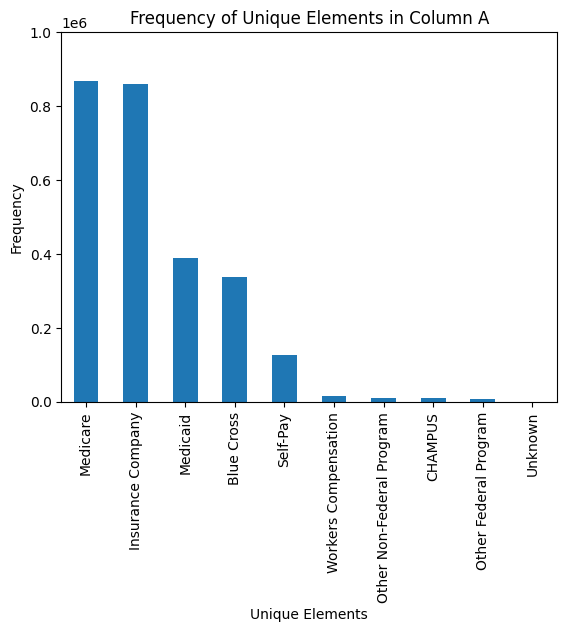

In [ ]:
element_frequencies = df['Source of Payment 1'].value_counts()
element_frequencies.plot(kind='bar')
plt.ylim(0, 1000000)
plt.xlabel('Unique Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Elements in Column A')
plt.show()


In [ ]:
df['Source of Payment 1'].count()

2622133

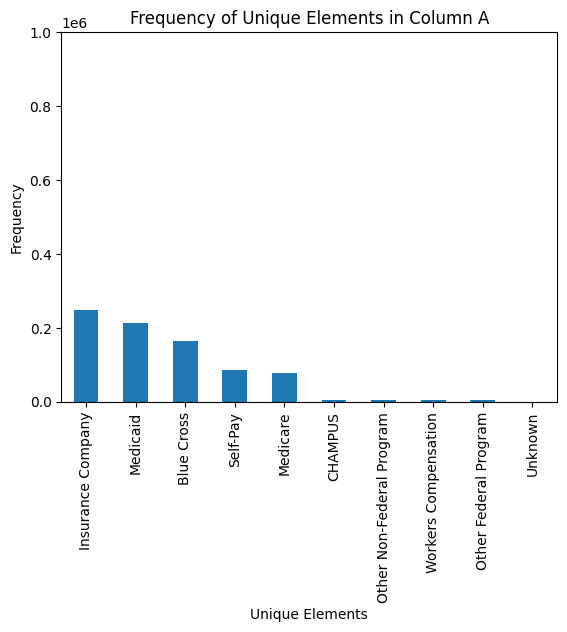

In [ ]:
element_frequencies = SP.value_counts()
element_frequencies.plot(kind='bar')
plt.ylim(0, 1000000)
plt.xlabel('Unique Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Elements in Column A')
plt.show()


In [ ]:
SP.count()

810381

In [ ]:
df['Source of Payment 1'].count() - SP.count()

1811752

In [ ]:
df['Length of Stay'].unique()

array(['1', '15', '3', '5', '4', '2', '9', '120 +', '13', '18', '8', '7',
       '6', '11', '17', '25', '16', '47', '20', '37', '12', '19', '27',
       '10', '31', '14', '22', '29', '87', '103', '109', '85', '30', '26',
       '44', '21', '36', '72', '89', '76', '49', '98', '105', '69', '45',
       '32', '57', '24', '39', '81', '33', '28', '23', '77', '88', '63',
       '55', '41', '61', '53', '38', '51', '40', '35', '59', '46', '50',
       '92', '64', '34', '73', '60', '67', '68', '97', '80', '82', '71',
       '95', '113', '118', '54', '91', '100', '115', '90', '42', '108',
       '58', '70', '65', '43', '66', '94', '48', '75', '112', '52', '78',
       '62', '106', '84', '107', '93', '104', '56', '117', '79', '116',
       '83', '74', '96', '86', '114', '110', '99', '102', '101', 27, 4, 2,
       3, 25, 12, 15, 16, 31, 23, 22, 1, 28, 29, 26, 7, 11, 5, 20, 13, 14,
       6, 30, 21, 18, 17, 10, 24, 9, 34, 8, 32, 19, 38, 33, 36, 35, 98,
       50, 51, 55, 66, 43, 77, 84, 41, 40, 91,

In [ ]:
column_names = df.columns

for column_name in column_names:
    print(column_name)

index
Health Service Area
Hospital County
Operating Certificate Number
Facility ID
Facility Name
Age Group
Zip Code - 3 digits
Gender
Race
Ethnicity
Length of Stay
Type of Admission
Patient Disposition
Discharge Year
CCS Diagnosis Code
CCS Diagnosis Description
CCS Procedure Code
CCS Procedure Description
APR DRG Code
APR DRG Description
APR MDC Code
APR MDC Description
APR Severity of Illness Code
APR Severity of Illness Description
APR Risk of Mortality
APR Medical Surgical Description
Source of Payment 1
Source of Payment 2
Source of Payment 3
Attending Provider License Number
Operating Provider License Number
Other Provider License Number
Birth Weight
Abortion Edit Indicator
Emergency Department Indicator
Total Charges
Total Costs


In [ ]:
df['CCS Diagnosis Description']

0             INTESTINAL INFECTION
1                   OTHER FRACTURE
2             SECONDARY MALIGNANCY
3          REHAB/PROSTH FIT/ADJUST
4                   OSTEOARTHRITIS
                    ...           
2622128       OTHR PREGNANCY COMPL
2622129       OTHR PREGNANCY COMPL
2622130           INDUCED ABORTION
2622131       OTHR PREGNANCY COMPL
2622132       SPONTANEOUS ABORTION
Name: CCS Diagnosis Description, Length: 2622133, dtype: object

In [ ]:
df['CCS Diagnosis Code']

0          135.0
1          231.0
2           42.0
3          254.0
4          203.0
           ...  
2622128    181.0
2622129    181.0
2622130    178.0
2622131    181.0
2622132    177.0
Name: CCS Diagnosis Code, Length: 2622133, dtype: float64

In [ ]:
df['APR Severity of Illness Description']

0             Minor
1             Major
2             Major
3          Moderate
4             Minor
             ...   
2622128       Major
2622129    Moderate
2622130       Minor
2622131       Minor
2622132    Moderate
Name: APR Severity of Illness Description, Length: 2622133, dtype: object

In [ ]:
df['APR Severity of Illness Description'].unique()

array(['Minor', 'Major', 'Moderate', 'Extreme', nan], dtype=object)

In [ ]:
df['APR Severity of Illness Code'].unique()

array([1, 3, 2, 4, 0])

In [ ]:
df['APR Risk of Mortality']


0            Minor
1          Extreme
2            Major
3            Minor
4            Minor
            ...   
2622128      Minor
2622129      Minor
2622130      Minor
2622131      Minor
2622132      Minor
Name: APR Risk of Mortality, Length: 2622133, dtype: object

In [ ]:
df['APR Risk of Mortality'].unique()

array(['Minor', 'Extreme', 'Major', 'Moderate', nan], dtype=object)

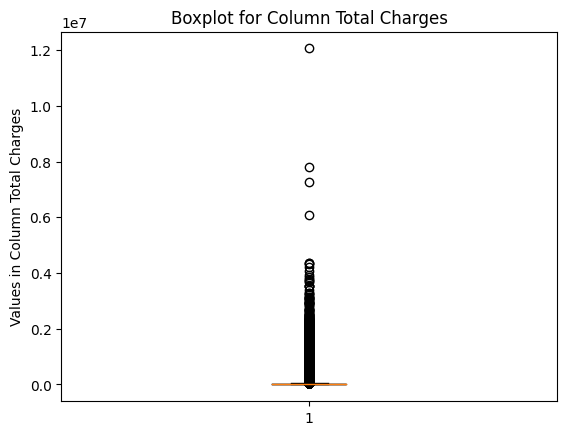

In [ ]:
# Replace 'A' with the name of the column you want to create a boxplot for
plt.boxplot(df['Total Charges'])
plt.title('Boxplot for Column Total Charges')
plt.ylabel('Values in Column Total Charges')
plt.show()


In [ ]:
df['APR DRG Description']

0           NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING
1          MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...
2                                       DIGESTIVE MALIGNANCY
3                                             REHABILITATION
4                                      HIP JOINT REPLACEMENT
                                 ...                        
2622128    OTHER O.R. PROC FOR OBSTETRIC DIAGNOSES EXCEPT...
2622129    D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...
2622130    D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...
2622131    D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...
2622132    D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...
Name: APR DRG Description, Length: 2622133, dtype: object

In [ ]:
df['APR DRG Code']

0          249
1          912
2          240
3          860
4          301
          ... 
2622128    546
2622129    544
2622130    544
2622131    544
2622132    544
Name: APR DRG Code, Length: 2622133, dtype: int64

In [ ]:
categorical_columns = ['Health Service Area', 'Hospital County',
       'Operating Certificate Number','Age Group', 'Gender', 'Race', 'Ethnicity',
       'Type of Admission', 'Patient Disposition','APR Risk of Mortality',
       'APR Medical Surgical Description', 'Source of Payment 1',
       'Source of Payment 2', 'Source of Payment 3','Emergency Department Indicator']
df_encoded = df.copy()
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [ ]:
df_encoded

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,0,0,0,1.0,Albany Medical Center Hospital,1,NaN,0,3,...,7,10,3623.0,NaN,NaN,0,N,1,4476.23,1672.65
1,1,0,0,0,1.0,Albany Medical Center Hospital,3,NaN,1,3,...,4,0,216951.0,216951.0,NaN,0,N,1,148612.34,51414.70
2,2,0,0,0,1.0,Albany Medical Center Hospital,4,NaN,1,3,...,0,7,3076.0,NaN,NaN,0,N,0,16561.99,4032.49
3,3,0,0,0,1.0,Albany Medical Center Hospital,4,NaN,0,3,...,2,7,140796.0,140796.0,170254.0,0,N,0,13593.51,4947.81
4,4,0,0,0,1.0,Albany Medical Center Hospital,4,NaN,0,3,...,2,7,170254.0,170254.0,170254.0,0,N,0,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,8,57,189,NaN,Abortion Record - Facility Name Redacted,2,OOS,0,1,...,7,10,NaN,NaN,NaN,0,Y,1,230373.65,83223.46
2622129,2622129,8,57,189,NaN,Abortion Record - Facility Name Redacted,2,OOS,0,1,...,7,10,NaN,NaN,NaN,0,Y,0,20335.27,7677.97
2622130,2622130,8,57,189,NaN,Abortion Record - Facility Name Redacted,2,OOS,0,1,...,7,10,NaN,NaN,NaN,0,Y,1,27775.54,9819.99
2622131,2622131,8,57,189,NaN,Abortion Record - Facility Name Redacted,2,OOS,0,1,...,10,10,NaN,NaN,NaN,0,Y,1,11738.58,3295.21
